<a href="https://colab.research.google.com/github/bebechien/trail/blob/main/The_Kepler_Trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Kepler Trail

The game inspired by "[The Oregon Trail](https://en.wikipedia.org/wiki/Oregon_Trail)"\
A demo for 2024Q4 Eng-JP Show & Tell + Social


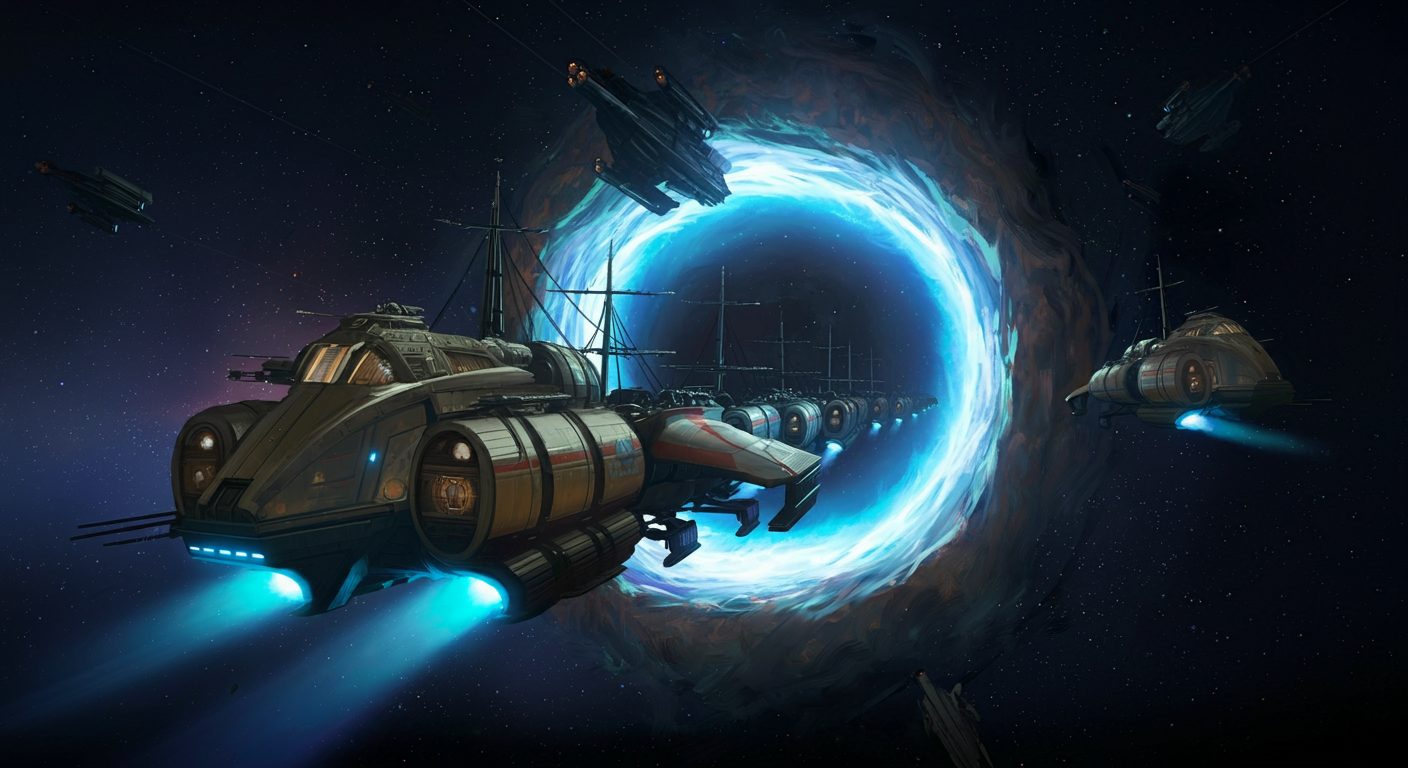

## Concept

The year is 2345, Humanity has reached for the stars! Earth is thriving, but the adventurous spirit of our species calls us beyond the cradle of our homeworld. You and your fellow explorers have been chosen for the maiden voyage of the “Pioneer”, a starship bound for the **Kepler-186f**. This journey to a new world, **580 light-years** away, is a testament to human ingenuity and our endless pursuit of knowledge.

This is a text-based adventure game where players journey across a procedurally generated world, powered by Gemmma (or Gemini). The LLM dynamically creates encounters, obstacles, and opportunities based on player choices and actions. This game leverages the power of LLM to create a truly replayable and unpredictable experience, where every journey is unique and player choices shape the story in meaningful ways.

**Note**: The Show & Tell demo with Gemma will highlight its on-device and multilingual capabilities.
The Gemini Expanded version will offer a more immersive and comprehensive gaming experience.


## Setup

Clone the repo and install dependencies

In [1]:
import os
from google.colab import userdata

os.environ["GEMINI_API_KEY"] = userdata.get('GEMINI_API_KEY')

!git clone https://github.com/bebechien/trail
%cd trail
!pip install jsonschema google-genai flask

Cloning into 'trail'...
remote: Enumerating objects: 351, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 351 (delta 22), reused 25 (delta 12), pack-reused 297 (from 1)
Receiving objects: 100% (351/351), 9.23 MiB | 26.40 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/trail


## Testing the model

Using "gemini-2.0-flash-exp"\
Imagine the model can generate an image and audio for random in-game events.


In [ ]:
from ui.game_tty import GameUI
from ai.gemini2 import GameAI

trail = GameUI("en")
game_ai = GameAI(trail)

event = game_ai.generate_event()
print(event)

{'text': "A minor meteor shower unexpectedly crosses your path. While your ship's shields hold, some of the smaller debris strikes your supply hold, damaging some of the nutrient paste packaging. You manage to salvage most of it, but a bit is lost to the vacuum.", 'effect': {'supply': -10, 'health': 0, 'day': 0}}


A minor meteor shower unexpectedly crosses your path. While your ship's shields hold, some of the smaller debris strikes your supply hold, damaging some of the nutrient paste packaging. You manage to salvage most of it, but a bit is lost to the vacuum.


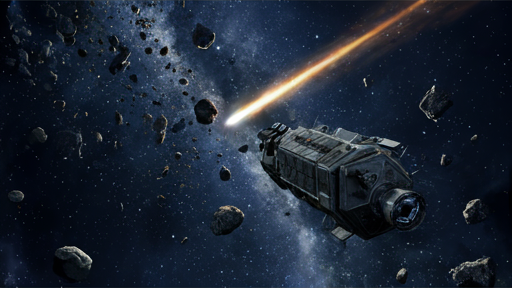

In [ ]:
import base64
from IPython import display

game_ai.generate_image(event['text'])
print(event['text'])
display.Image(data=base64.b64decode(trail.random_event_img.split(',')[1]))

In [ ]:
import base64
from IPython import display

game_ai.generate_audio(event['text'])
print(event['text'])
open('audio.wav', 'wb').write(base64.b64decode(trail.random_event_aud.split(',')[-1]))
display.Audio('audio.wav', autoplay=True)

A minor meteor shower unexpectedly crosses your path. While your ship's shields hold, some of the smaller debris strikes your supply hold, damaging some of the nutrient paste packaging. You manage to salvage most of it, but a bit is lost to the vacuum.


## Play the Game

Launch the flast app in the background

In [2]:
GAME_LANG = "en" # @param ["en", "ko", "ja"]
GAME_DEBUG = True # @param {type:"boolean"}
os.environ["GAME_LANG"] = GAME_LANG
os.environ["GAME_DEBUG"] = str(GAME_DEBUG)

os.environ["GAME_AI"] = "gemini2"
os.environ["GAME_UI"] = "web"

import subprocess
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        "python trail.py",
        shell=True,
        stdout=stdout_file,
        stderr=stderr_file
    )

And open it from the browser

In [3]:
from google.colab.output import serve_kernel_port_as_iframe
serve_kernel_port_as_iframe(5000, width=1280, height=720)

<IPython.core.display.Javascript object>